<a href="https://colab.research.google.com/github/Rithvikns/Machine_Learning/blob/main/Supervised_Learning/Both_classification_Regression/KNN%20/KNN_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Step 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [12]:
# Step 2: Load Wine Dataset
wine = load_wine()
X = wine.data
y = wine.target

In [13]:
# Step 3: Split into Train & Test Sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [4]:
# Step 4: Normalize the data (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# Step 5: Train KNN Model (Choosing K=7)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [17]:
# Step 6: Make predictions
y_pred = knn.predict(X_test)

In [18]:
# Step 7: Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print("KNN Model Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


KNN Model Accuracy: 0.7222222222222222

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.73      0.57      0.64        14
           2       0.50      0.60      0.55        10

    accuracy                           0.72        36
   macro avg       0.72      0.72      0.72        36
weighted avg       0.73      0.72      0.72        36



In [19]:
# Step 8: Display Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[12  0  0]
 [ 0  8  6]
 [ 1  3  6]]


In [20]:
# Step 9: Cross-Validation (5-fold)
cv_scores = cross_val_score(knn, X, y, cv=5)
print("\nCross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", np.mean(cv_scores))


Cross-Validation Accuracy Scores: [0.66666667 0.61111111 0.61111111 0.74285714 0.77142857]
Mean Cross-Validation Accuracy: 0.6806349206349206


In [21]:
# Step 10: Find Optimal K (Optional)
error_rates = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    error_rates.append(1 - accuracy_score(y_test, y_pred_k))

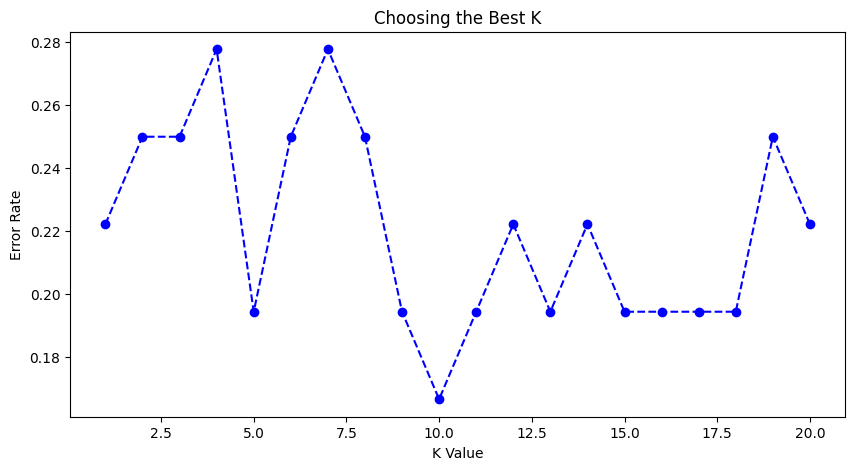

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), error_rates, marker='o', linestyle='dashed', color='b')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.title('Choosing the Best K')
plt.show()